# 🛒 Análisis de Ventas Online

## 1. Introducción

En un entorno digital cada vez más competitivo, comprender el comportamiento de los consumidores y el rendimiento de los productos es crucial para la toma de decisiones estratégicas. Este proyecto tiene como objetivo realizar un análisis exploratorio de un conjunto de datos de transacciones de ventas online, con el fin de descubrir patrones relevantes y extraer insights que puedan mejorar las decisiones de negocio.

A lo largo del análisis se abordarán los siguientes objetivos:

- 📈 Analizar las ventas a lo largo del tiempo para detectar patrones estacionales o tendencias.
- 🌍 Investigar qué categorías de productos tienen mayor popularidad en distintas regiones.
- 💳 Evaluar cómo influyen los métodos de pago en los ingresos o el volumen de ventas.
- 🏆 Identificar los productos más vendidos dentro de cada categoría.
- 📌 Examinar el rendimiento de productos y categorías según la región para orientar campañas de marketing.

Este análisis está orientado a perfiles de negocio y dirección, proporcionando conclusiones claras respaldadas por visualizaciones y métricas clave. Las herramientas empleadas serán Python, utilizando librerías como **pandas, matplotlib, seaborn y numpy**.

## 2. Descripción del Dataset

El dataset utilizado en este proyecto contiene **240 registros**, cada uno correspondiente a una transacción individual realizada en una tienda online. Las variables disponibles son las siguientes:

#### **Columnas**:

- **Transaction ID**: Identificador único de cada transacción.  
- **Date**: Fecha en la que se realizó la transacción.  
- **Product Category**: Categoría general del producto vendido (Ej: Electronics, Clothing, Books, etc.).  
- **Product Name**: Nombre o modelo específico del producto.  
- **Units Sold**: Número de unidades vendidas en la transacción.  
- **Unit Price**: Precio por unidad del producto.  
- **Total Revenue**: Ingresos totales generados por la transacción (*Units Sold × Unit Price*).  
- **Region**: Región geográfica en la que se realizó la venta (Ej: North America, Europe, Asia).  
- **Payment Method**: Método de pago utilizado (Ej: Credit Card, PayPal, Debit Card).  


## 3. Limpieza de los datos

In [ ]:
# 1. Importamos librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 2. Cargamos el dataset
data = pd.read_csv(r"C:\Users\Borja\Desktop\Analisis de Datos\DATASETS\Online Sales Project\Online Sales Data.csv")

# 3. Mostramos las primeras filas para una vista general
data.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [ ]:
# 4. Comprobamos si hay valores nulos en el dataset
null_values = data.isnull().sum()
null_values

Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64

In [ ]:
# 5. Comprobamos si hay filas duplicadas
duplicate_rows = data.duplicated().sum()
duplicate_rows

np.int64(0)

In [ ]:
# 6. Descripción general de la columna de fechas
date_info = data['Date'].describe()
date_info

count            240
unique           240
top       2024-01-01
freq               1
Name: Date, dtype: object

In [ ]:
# 7. Convertimos la columna 'Date' al tipo datetime para facilitar el análisis temporal
data['Date'] = pd.to_datetime(data['Date'])

data.dtypes

Transaction ID               int64
Date                datetime64[ns]
Product Category            object
Product Name                object
Units Sold                   int64
Unit Price                 float64
Total Revenue              float64
Region                      object
Payment Method              object
dtype: object

In [ ]:
# 8. Separamos la fecha en año, mes, día, nombre del día de la semana y número de semana.
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month_name()
data['Day'] = data['Date'].dt.day
data['Day_of_Week'] = data['Date'].dt.day_name()
data['Week_Number'] = data['Date'].dt.isocalendar().week

data.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method,Year,Month,Day,Day_of_Week,Week_Number
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card,2024,January,1,Monday,1
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal,2024,January,2,Tuesday,1
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card,2024,January,3,Wednesday,1
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card,2024,January,4,Thursday,1
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal,2024,January,5,Friday,1


Objetivo: Evaluar el rendimiento general y temporal de las ventas.

# 📊 Análisis de ventas

## **Comportamiento temporal de ventas y unidades vendidas**

### **1.** ¿Cómo han evolucionado las ventas mes a mes durante el periodo observado?

In [ ]:
# Agrupamos los datos por mes y sumamos los ingresos totales (ventas) en cada mes
monthly_sales = data.groupby('Month')['Total Revenue'].sum().reset_index()
monthly_sales

,Month,Total Revenue
0,April,12451.69
1,August,7278.11
2,February,10803.37
3,January,14548.32
4,July,6797.08
5,June,7384.55
6,March,12849.24
7,May,8455.49


In [ ]:
# Lista con los meses en orden de enero a agosto
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August']

# Convertimos 'Month' en una categoría ordenada según month_order
monthly_sales['Month'] = pd.Categorical(monthly_sales['Month'], categories=month_order, ordered=True)

# Tras establecer ese orden, ordenamos los datos por mes
monthly_sales = monthly_sales.sort_values('Month').reset_index(drop=True)
monthly_sales

,Month,Total Revenue
0,January,14548.32
1,February,10803.37
2,March,12849.24
3,April,12451.69
4,May,8455.49
5,June,7384.55
6,July,6797.08
7,August,7278.11


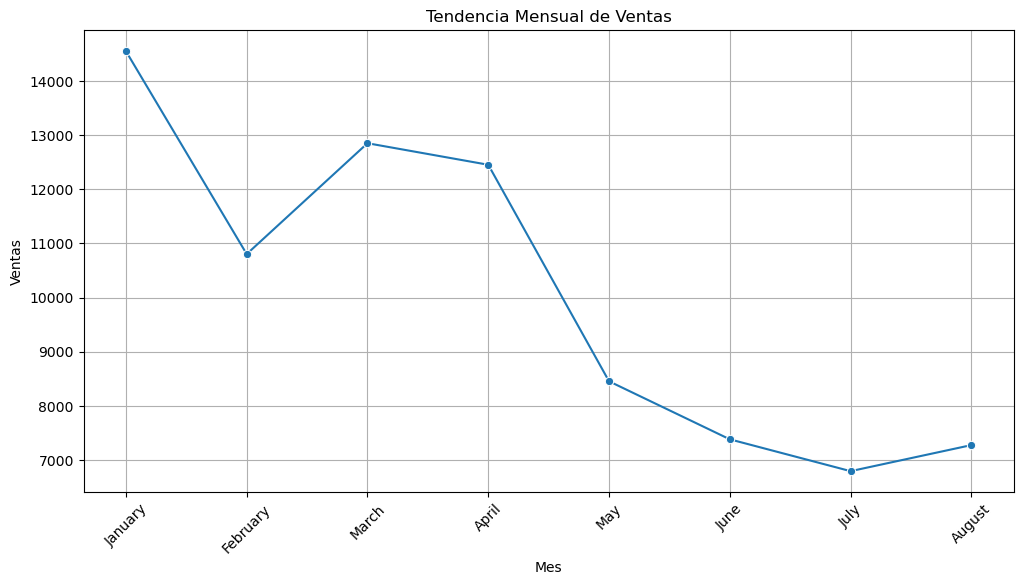

In [ ]:
# Gráfico de la tendencia mensual de ventas
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Total Revenue',marker='o')
plt.title('Tendencia Mensual de Ventas')
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

✅ **Respuesta:**



La tendencia general de las ventas mensuales durante el periodo presenta fluctuaciones:

- El pico **máximo** se registró en **enero**.

- **Descenso** en **febrero**, seguido de un **repunte** en **marzo**.

- **Caída** sostenida de **abril a julio**.

- **Leve aumento** entre **julio y agosto**.

### **2.** ¿Qué meses tuvieron el mayor volumen de unidades vendidas?

In [ ]:
# Agrupamos los datos por mes y sumamos el número de unidades vendidas en cada mes
monthly_units = data.groupby('Month')['Units Sold'].sum().reset_index()
monthly_units

,Month,Units Sold
0,April,65
1,August,52
2,February,77
3,January,68
4,July,53
5,June,61
6,March,82
7,May,60


In [ ]:
# Al igual que antes, establecemos el orden según month_order para ordenarlos correctamente
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August']
monthly_units['Month'] = pd.Categorical(monthly_units['Month'], categories=month_order, ordered=True)

monthly_units = monthly_units.sort_values('Month').reset_index(drop=True)
monthly_units

,Month,Units Sold
0,January,68
1,February,77
2,March,82
3,April,65
4,May,60
5,June,61
6,July,53
7,August,52


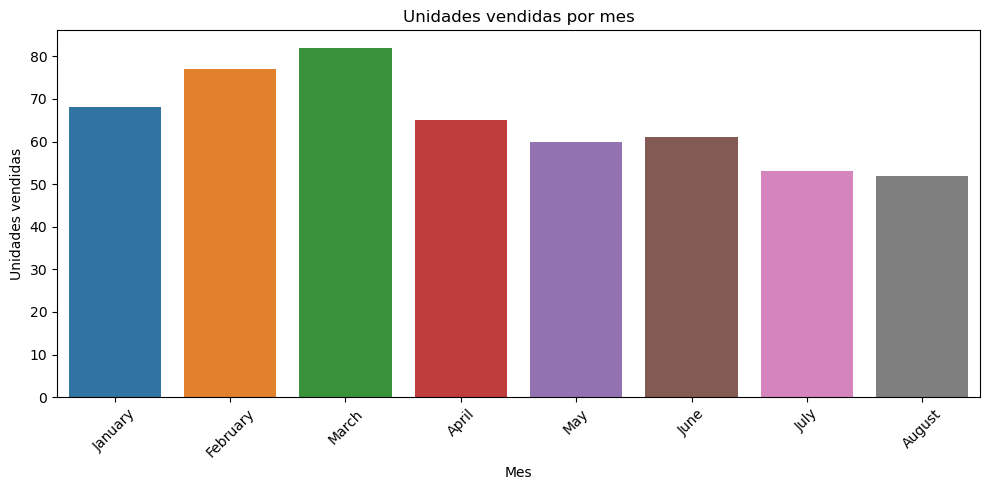

In [ ]:
# Gráfico de la tendencia mensual de unidades vendidas por mes
plt.figure(figsize=(10, 5))
sns.barplot(x='Month', y='Units Sold', data=monthly_units, hue='Month')
plt.title("Unidades vendidas por mes")
plt.xlabel("Mes")
plt.ylabel("Unidades vendidas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

✅ **Respuesta:**

Los meses con mayor volumen de unidades vendidas fueron:

- **Marzo**: 82 

- **Febrero**: 77 

- **Enero**: 68 

Los meses restantes se mantuvieron relativamente estables, con una ligera disminución gradual.

### **3.** ¿Qué semanas de cada mes registran las mayores ventas? ¿Y unidades vendidas?

In [ ]:
# Agrupamos y sumamos los ingresos totales por mes y número de semana
weekly_sales = data.groupby(['Month','Week_Number'])[['Total Revenue','Units Sold']].sum().reset_index()
weekly_sales['Week_Number'] = weekly_sales.groupby('Month').cumcount() + 1

# De nuevo, establecemos el orden según month_order para ordenarlos correctamente
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August']
weekly_sales['Month'] = pd.Categorical(weekly_sales['Month'], categories=month_order, ordered=True)

weekly_sales = weekly_sales.sort_values(by = ['Month','Week_Number']).reset_index(drop=True)

# Renombramos las semanas como "Mes - S1", "Mes - S2", etc.
weekly_sales['Week_Number'] = weekly_sales['Month'].str[:3] + ' - S' + weekly_sales['Week_Number'].astype(str)
weekly_sales

,Month,Week_Number,Total Revenue,Units Sold
0,January,Jan - S1,5513.83,17
1,January,Jan - S2,4211.83,17
2,January,Jan - S3,2767.84,16
3,January,Jan - S4,1064.87,13
4,January,Jan - S5,989.95,5
5,February,Feb - S1,579.86,14
6,February,Feb - S2,5374.86,16
7,February,Feb - S3,2361.86,19
8,February,Feb - S4,1857.84,17
9,February,Feb - S5,628.95,11


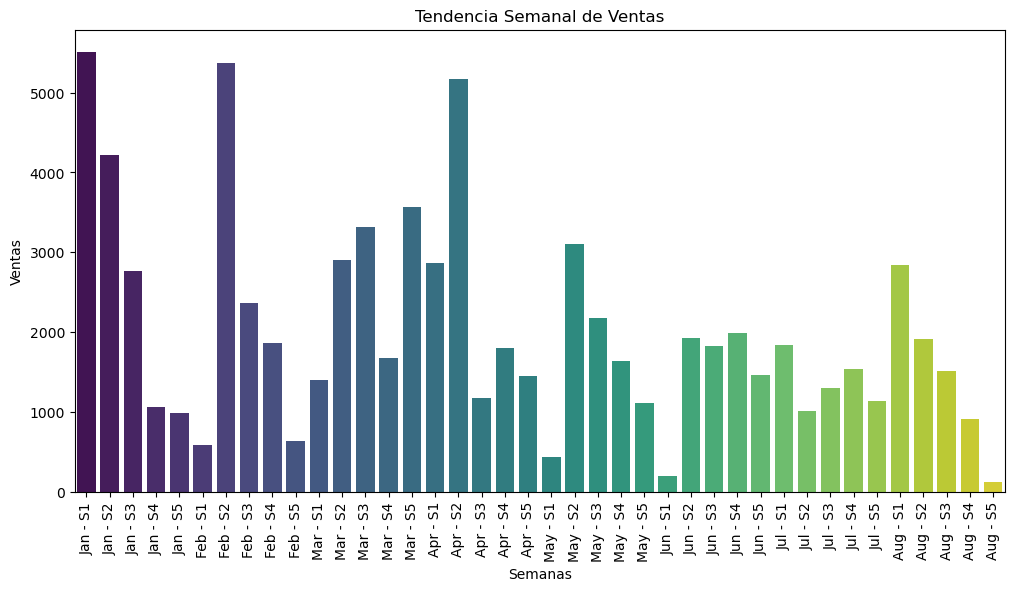

In [ ]:
# Gráfico de la tendencia semanal de ventas
plt.figure(figsize=(12, 6))
sns.barplot(data=weekly_sales, x='Week_Number', y='Total Revenue', hue='Week_Number', palette = 'viridis')
plt.title('Tendencia Semanal de Ventas')
plt.xlabel('Semanas')
plt.ylabel('Ventas')
plt.xticks(rotation=90)
plt.show()

✅ **Respuesta:**

Semanas con mayores ingresos por mes:

- **Enero:** S3

- **Febrero:** S4

- **Marzo:** S1

- **Abril:** S5

- **Mayo:** S2

- **Junio:** S3

- **Julio:** S4

- **Agosto:** S1

En la mayoría de los meses, las **ventas alcanzan su punto máximo** durante las **dos primeras semanas**, excepto en junio, donde el mayor volumen de ventas se concentra en la cuarta semana. Además, durante **todo el verano**, las ventas se mantienen **relativamente estables**, probablemente debido al periodo vacacional.



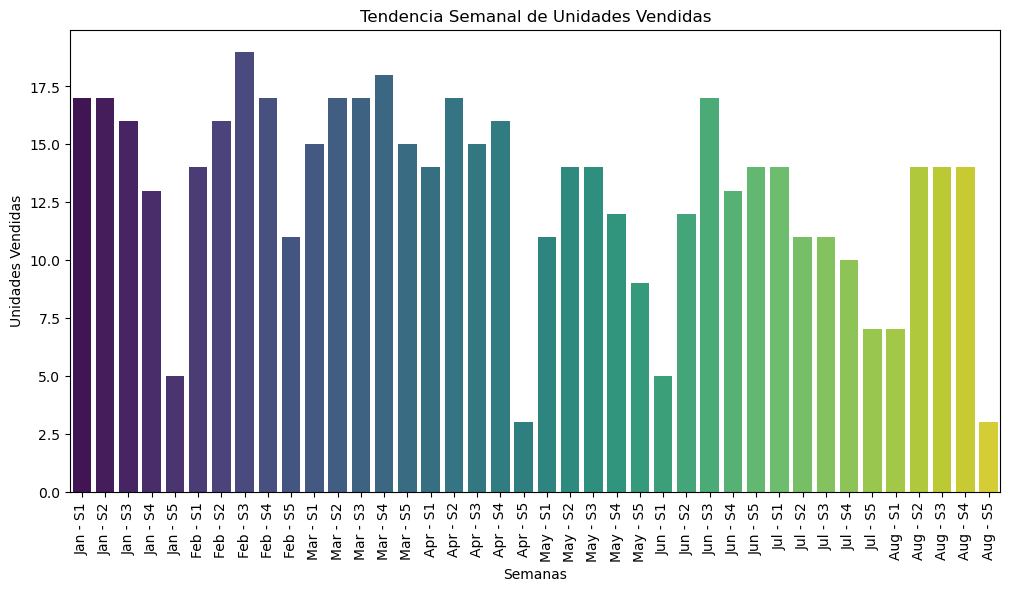

In [ ]:
# Gráfico de la tendencia semanal de unidades vendidas
plt.figure(figsize=(12, 6))
sns.barplot(data=weekly_sales, x='Week_Number', y='Units Sold', hue='Week_Number', palette = 'viridis')
plt.title('Tendencia Semanal de Unidades Vendidas')
plt.xlabel('Semanas')
plt.ylabel('Unidades Vendidas')
plt.xticks(rotation=90)
plt.show()

✅ **Respuesta:**

Se observa que las **menores unidades vendidas** suelen ocurrir en la **última semana de cada mes**, salvo en junio, donde la primera semana registra el volumen más bajo. En general, **el resto de las semanas** presenta una **estabilidad** relativa en las unidades vendidas.

### **4.** ¿Qué días de la semana se obtienen más ingresos? ¿Se generan más ingresos en días laborales o fines de semana?

In [ ]:
# Agrupamos y sumamos ingresos totales por semana
daily_sales = data.groupby(['Day_of_Week'])['Total Revenue'].sum().sort_values(ascending=False).reset_index()
daily_sales

,Day_of_Week,Total Revenue
0,Tuesday,13518.34
1,Friday,12918.74
2,Monday,12253.35
3,Saturday,11494.02
4,Sunday,11153.30
5,Wednesday,10402.14
6,Thursday,8827.96


✅ **Respuesta:**

Los tres días de la semana con mayores ingresos son:

- **Martes:** 13518.34 

- **Viernes:** 12918.74

- **Lunes:** 12253.35


In [ ]:
# Filtramos las filas correspondientes a los fines de semana (sábado y domingo) 
weekends_sales = daily_sales[(daily_sales['Day_of_Week'] == 'Saturday') | (daily_sales['Day_of_Week'] == 'Sunday')]

# Sumamos los ingresos totales de los fines de semana
total_weekends_sales = weekends_sales['Total Revenue'].sum()
float(total_weekends_sales)

22647.32

In [ ]:
# Filtramos las filas correspondientes a los días laborales (lunes a viernes) 
not_weekends_sales = daily_sales.drop(weekends_sales.index)

# Sumamos los ingresos totales de los días laborales
total_not_weekends_sales = not_weekends_sales['Total Revenue'].sum()
float(total_not_weekends_sales)

57920.53

✅ **Respuesta:**

Se generan **más ingresos** en los **días laborales** con un total de **57920,53**, en comparación con los **fines de semana** que suman **22647,32**.
Esto muestra que la mayoría de las compras se realizan durante la semana laboral, probablemente por hábitos de consumo relacionados con el trabajo y las actividades cotidianas.

### **5.** ¿Cómo varían las ventas mensualmente a lo largo del periodo para cada día de la semana?

In [ ]:
# Agrupamos y sumamos los ingresos totales por mes y día de la semana
weekly_day_sales = data.groupby(['Day_of_Week','Month'])['Total Revenue'].sum().reset_index()
weekly_day_sales

,Day_of_Week,Month,Total Revenue
0,Friday,April,5209.94
1,Friday,August,986.98
2,Friday,February,526.87
3,Friday,January,1869.93
4,Friday,July,829.89
5,Friday,June,311.42
6,Friday,March,1953.86
7,Friday,May,1229.85
8,Monday,April,608.88
9,Monday,August,614.95


In [ ]:
# Lista con los meses y días de la semana en orden
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August']

# Convertimos 'Month' y 'Day_of_Week' en categorías ordenadas según month_order y or
weekly_day_sales['Day_of_Week'] = pd.Categorical(weekly_day_sales['Day_of_Week'], categories=days_order, ordered=True)
weekly_day_sales['Month'] = pd.Categorical(weekly_day_sales['Month'], categories=month_order, ordered=True)

# Tras establecer esos órdenes, ordenamos los datos por día de la semana y mes
weekly_day_sales = weekly_day_sales.sort_values(by=['Day_of_Week','Month']).reset_index(drop=True)
weekly_day_sales

,Day_of_Week,Month,Total Revenue
0,Monday,January,3775.91
1,Monday,February,3544.91
2,Monday,March,463.92
3,Monday,April,608.88
4,Monday,May,827.91
5,Monday,June,928.95
6,Monday,July,1487.92
7,Monday,August,614.95
8,Tuesday,January,1457.87
9,Tuesday,February,1948.93


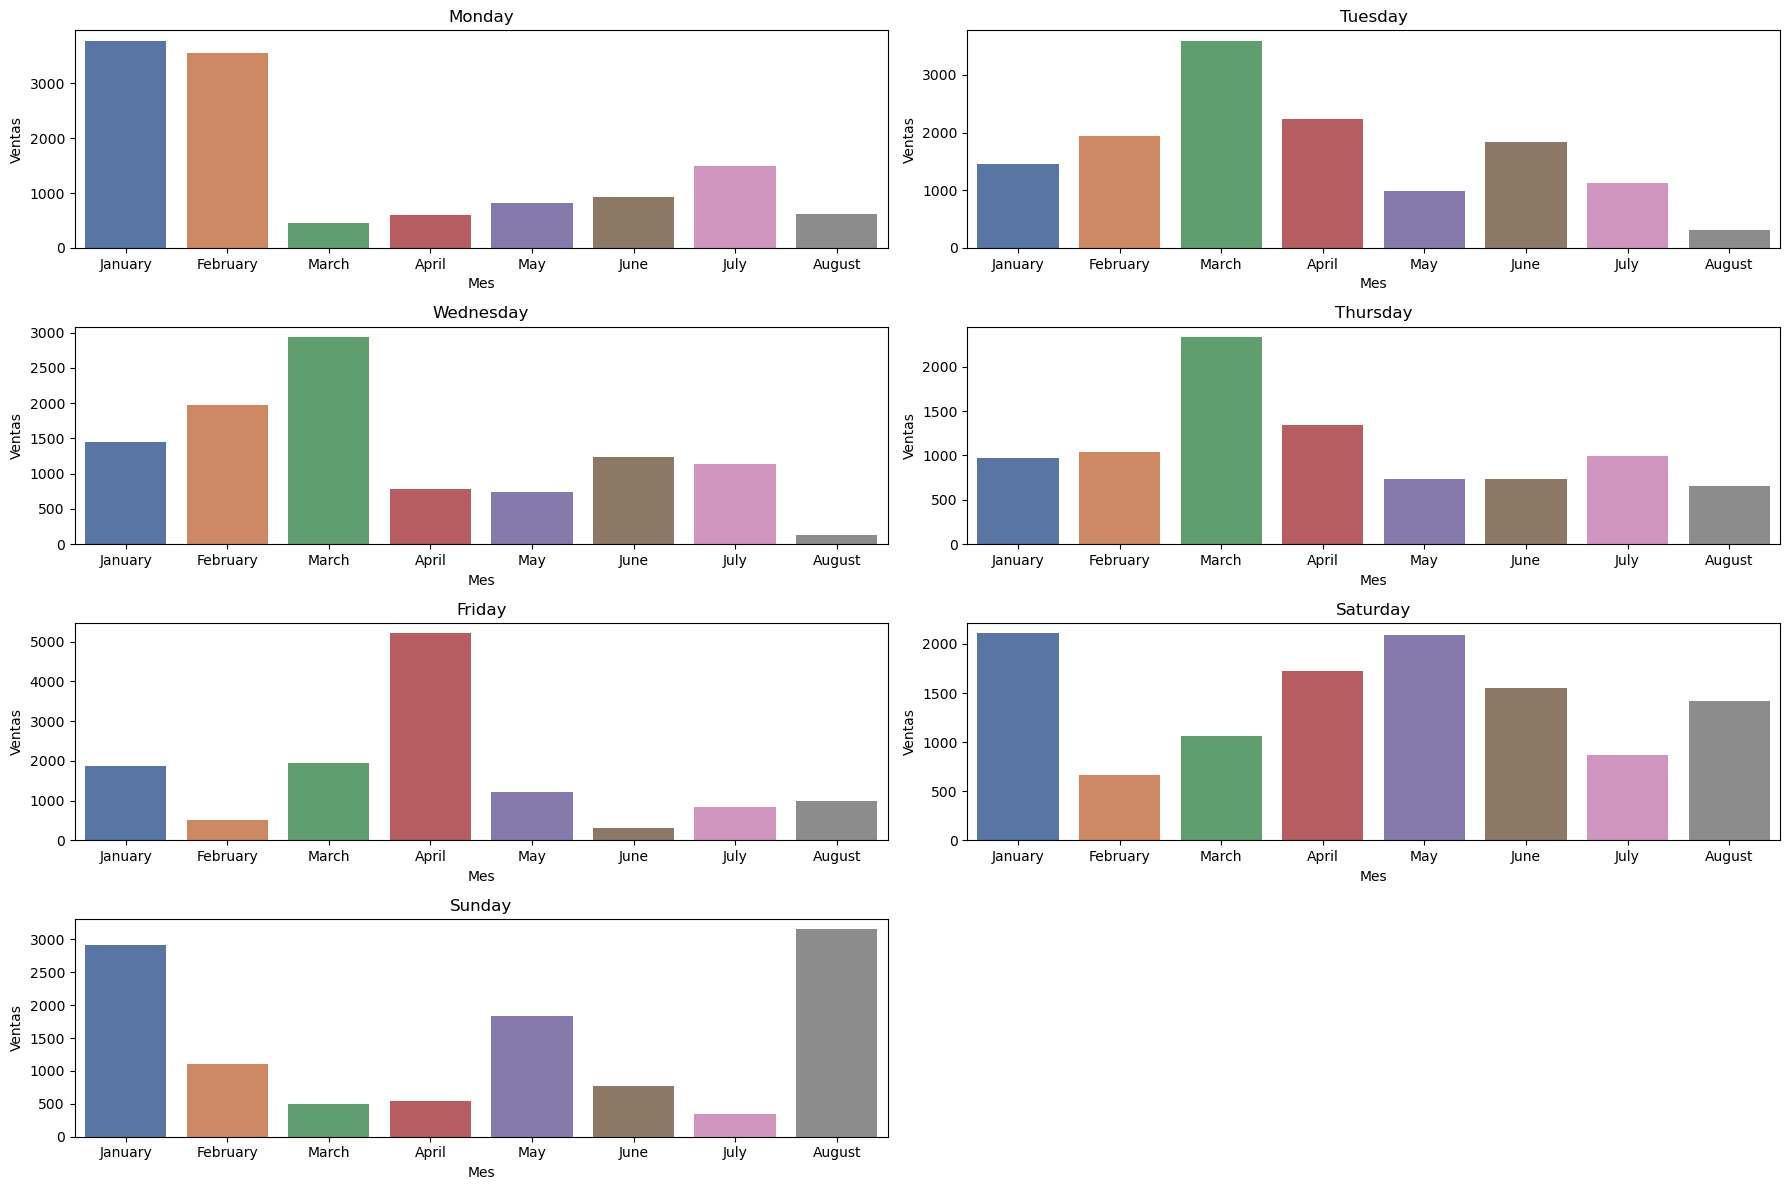

In [ ]:
# Gráficos de las ventas por mes para cada día de la semana
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 12))
axes = axes.flatten()

for i, day in enumerate(days_order):
    ax = axes[i]
    day_data = weekly_day_sales[weekly_day_sales['Day_of_Week'] == day]
    sns.barplot(data=day_data, x='Month', y='Total Revenue', hue ='Month', palette='deep', ax=ax)
    ax.set_title(day)
    ax.set_xlabel('Mes')
    ax.set_ylabel('Ventas')

fig.delaxes(axes[-1])
plt.tight_layout()

✅ **Respuesta:**

Variación mensual de las ventas por día de la semana:

- **Lunes:** Las ventas se **concentran** principalmente en **enero y febrero**, siendo notablemente bajas en el resto de los meses.

- **Martes, miércoles y jueves:** Siguen un patrón similar, con un aumento desde enero hasta un **pico en marzo**, seguido de una disminución gradual.

- **Viernes:** Presentan un comportamiento fluctuante, con descensos y ascensos alternados, siendo **abril** el mes con el **mayor volumen** de ventas.

- **Sábados:** Comienzan con un **alto volumen** de ventas en **enero**, experimentan una caída drástica en febrero, para luego recuperarse y mantenerse en niveles moderados.

- **Domingos:** Inician con ventas elevadas que disminuyen gradualmente mes a mes hasta un **repunte en agosto**.

##  **Comportamiento de ventas según la región**

### **6.** ¿Cómo han evolucionado los ingresos en cada región a lo largo del tiempo?

In [ ]:
# Agrupamos y sumamos los ingresos totales en cada mes y región
monthly_region_sales = data.groupby(['Month','Region'])['Total Revenue'].sum().reset_index()
monthly_region_sales

,Month,Region,Total Revenue
0,April,Asia,3329.60
1,April,Europe,2191.33
2,April,North America,6930.76
3,August,Asia,2178.62
4,August,Europe,1839.66
5,August,North America,3259.83
6,February,Asia,4278.68
7,February,Europe,3201.90
8,February,North America,3322.79
9,January,Asia,3369.67


In [ ]:
# Convertimos 'Month' en categorías ordenadas según month_order
monthly_region_sales['Month'] = pd.Categorical(monthly_region_sales['Month'], categories=month_order, ordered=True)

# Tras establecer esos órdenes, ordenamos los datos por mes
monthly_region_sales = monthly_region_sales.sort_values(by=['Region','Month']).reset_index(drop=True)
monthly_region_sales

,Month,Region,Total Revenue
0,January,Asia,3369.67
1,February,Asia,4278.68
2,March,Asia,2619.60
3,April,Asia,3329.60
4,May,Asia,1989.54
5,June,Asia,1945.38
6,July,Asia,2744.36
7,August,Asia,2178.62
8,January,Europe,2869.89
9,February,Europe,3201.90


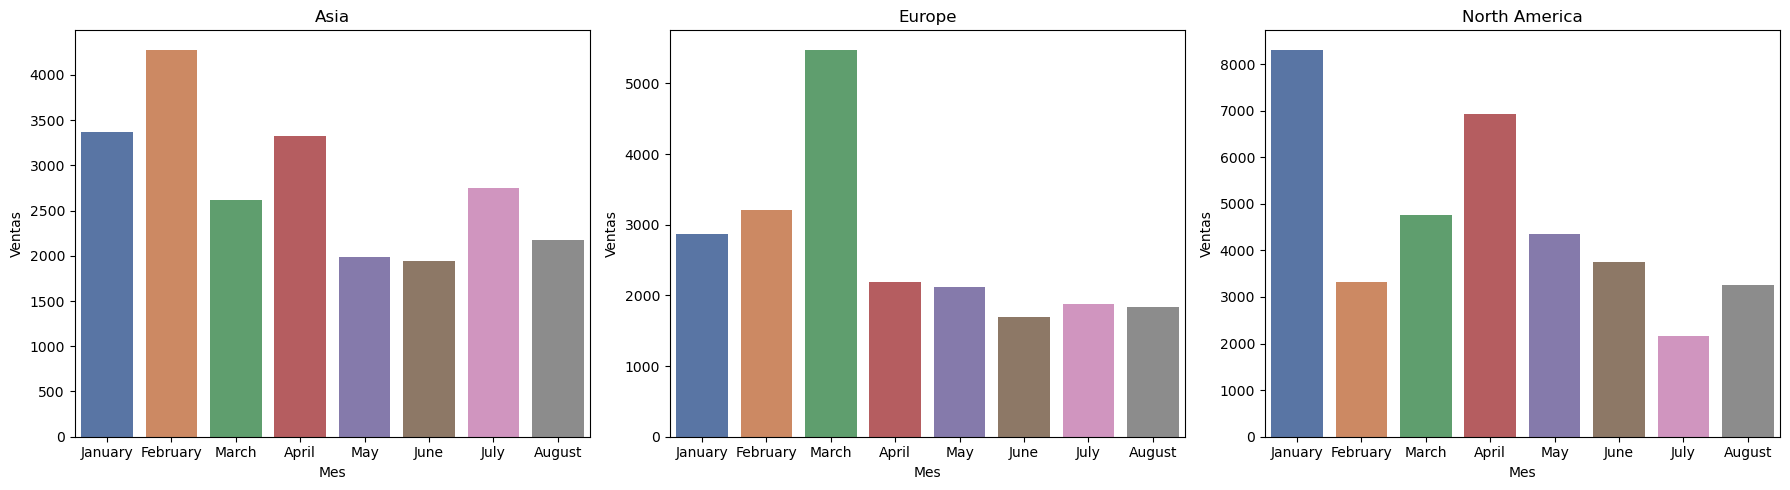

In [ ]:
# Gráficos de las ventas por mes para cada región
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
axes = axes.flatten()

region_order = ['Asia', 'Europe', 'North America']
for i, region in enumerate(region_order):
    ax = axes[i]
    region_data = monthly_region_sales[monthly_region_sales['Region'] == region]
    sns.barplot(data=region_data, x='Month', y='Total Revenue', hue ='Month', palette='deep', ax=ax)
    ax.set_title(region)
    ax.set_xlabel('Mes')
    ax.set_ylabel('Ventas')

plt.tight_layout()

✅ **Respuesta:**

### **7.** ¿Cuál es la distribución de ingresos por región?

In [ ]:
# Agrupamos y sumamos ingresos totales por región
revenue_by_region = data.groupby(["Region"])["Total Revenue"].sum().sort_values(ascending=False).reset_index()
revenue_by_region['Percentage'] = ((revenue_by_region['Total Revenue'] / revenue_by_region['Total Revenue'].sum()) * 100).round(2)
revenue_by_region

,Region,Total Revenue,Percentage
0,North America,36844.34,45.73
1,Asia,22455.45,27.87
2,Europe,21268.06,26.40


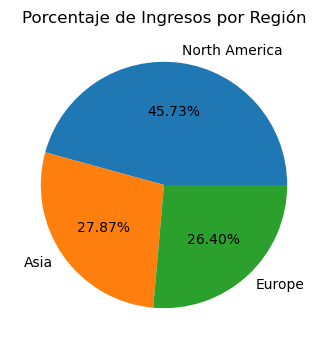

In [ ]:
# Graficamos el porcentaje de ingresos por región
plt.figure(figsize=(4, 4))
plt.pie(revenue_by_region['Percentage'], labels = revenue_by_region['Region'],autopct='%1.2f%%')
plt.title('Porcentaje de Ingresos por Región')
plt.show()

✅ **Respuesta:**

Distribución de los ingresos por región:

- **Norteamérica** aporta la mayor parte de los ingresos, con un **45.73%** del total.

- **Asia** representa el **27.87%** de los ingresos.

- **Europa:** contribuye con un **26.40%**.

### **8.** ¿Cómo varía el ticket promedio según la región?

In [ ]:
# Calculamos el promedio de ingresos por región
ticket_medio = data.groupby('Region')['Total Revenue'].mean().reset_index().sort_values(by='Total Revenue', ascending=False).round(2)
ticket_medio.columns = ['Region','Ticket Medio']
ticket_medio

,Region,Ticket Medio
2,North America,460.55
0,Asia,280.69
1,Europe,265.85


✅ **Respuesta:**

Ticket medio según la región:

- **Norteamérica:** 460.55

- **Asia:** 280.69

- **Europa:** 265.85

Esto indica que las transacciones en Norteamérica suelen tener un valor promedio más alto.

### 🌍 Bloque 2: Popularidad de categorías por región

**Objetivo**: Entender qué productos funcionan mejor en cada región para adaptar estrategias de marketing y distribución.

### **Preguntas:**

#### **1.** ¿Qué categorías de productos generan más ingresos a nivel general?

In [ ]:
# Agrupamos los datos por categoría y sumamos los ingresos
revenue_by_category = data.groupby("Product Category")["Total Revenue"].sum().sort_values(ascending=False).reset_index()
revenue_by_category

,Product Category,Total Revenue
0,Electronics,34982.41
1,Home Appliances,18646.16
2,Sports,14326.52
3,Clothing,8128.93
4,Beauty Products,2621.90
5,Books,1861.93


In [ ]:
sum_total_revenue =  revenue_by_category['Total Revenue'].sum()
sum_total_revenue

revenue_by_category['Percentage'] = ((revenue_by_category['Total Revenue'] / sum_total_revenue) * 100).round(2)
revenue_by_category

,Product Category,Total Revenue,Percentage
0,Electronics,34982.41,43.42
1,Home Appliances,18646.16,23.14
2,Sports,14326.52,17.78
3,Clothing,8128.93,10.09
4,Beauty Products,2621.90,3.25
5,Books,1861.93,2.31


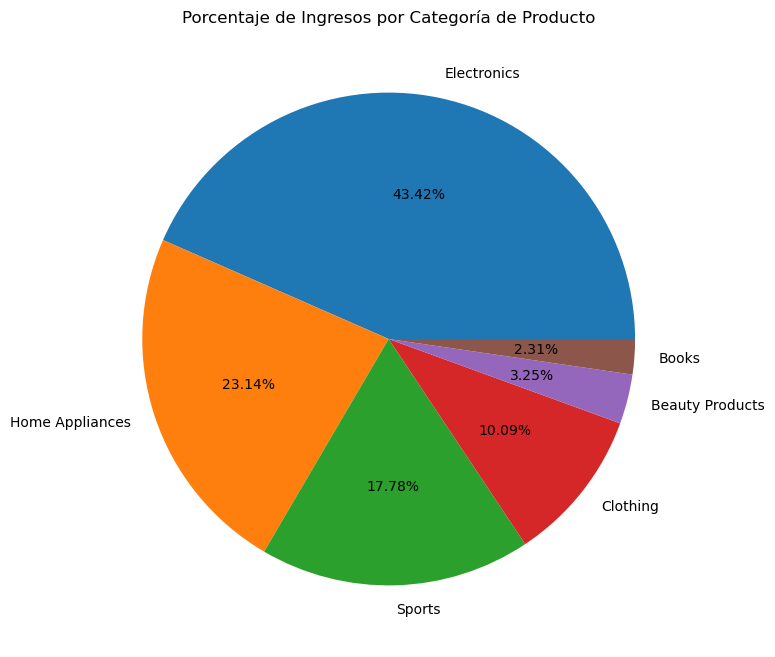

In [ ]:
# Graficamos
plt.figure(figsize=(8, 8))
plt.pie(revenue_by_category['Percentage'], labels = revenue_by_category['Product Category'],autopct='%1.2f%%')
plt.title('Porcentaje de Ingresos por Categoría de Producto')
plt.show()

#### **2.** ¿Cómo se distribuyen los ingresos o las unidades por categoría de producto en cada región?

In [ ]:
# Ingresos por categoría y región
revenue_by_region_category = data.groupby(["Region", "Product Category"])["Total Revenue"].sum().reset_index()
revenue_by_region_category

,Region,Product Category,Total Revenue
0,Asia,Clothing,8128.93
1,Asia,Sports,14326.52
2,Europe,Beauty Products,2621.90
3,Europe,Home Appliances,18646.16
4,North America,Books,1861.93
5,North America,Electronics,34982.41


In [ ]:
# Unidades vendidas por categoría y región
units_by_region_category = data.groupby(["Region", "Product Category"])["Units Sold"].sum().reset_index()
units_by_region_category

,Region,Product Category,Units Sold
0,Asia,Clothing,145
1,Asia,Sports,88
2,Europe,Beauty Products,46
3,Europe,Home Appliances,59
4,North America,Books,114
5,North America,Electronics,66


#### **3** ¿Hay alguna categoría de producto claramente dominante en alguna región?

In [ ]:
# Máximos por región en ingresos
dominant_category_by_region_revenue = revenue_by_region_category.loc[
    revenue_by_region_category.groupby("Region")["Total Revenue"].idxmax()]

dominant_category_by_region_revenue

,Region,Product Category,Total Revenue
1,Asia,Sports,14326.52
3,Europe,Home Appliances,18646.16
5,North America,Electronics,34982.41


In [ ]:
# Máximos por región en unidades vendidas
dominant_category_by_region_units = units_by_region_category.loc[
    units_by_region_category.groupby("Region")["Units Sold"].idxmax()]

dominant_category_by_region_units

,Region,Product Category,Units Sold
0,Asia,Clothing,145
3,Europe,Home Appliances,59
4,North America,Books,114


#### **4.** ¿Existen diferencias significativas entre regiones en cuanto a preferencias de categoría?

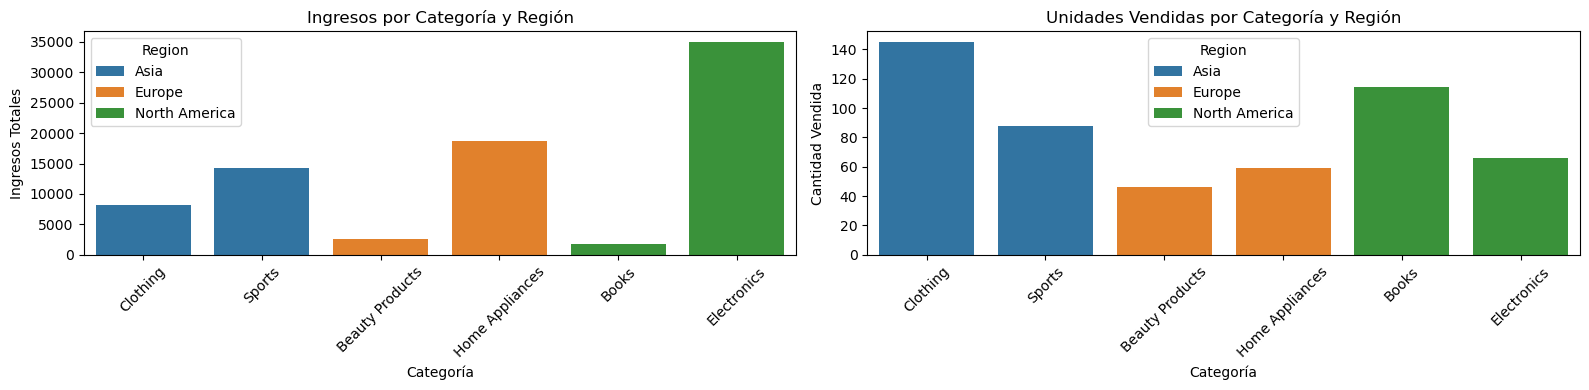

In [ ]:
# Comparamos ingresos y unidades vendidas por categoría entre distintas regiones para detectar preferencias regionales
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.barplot(x="Product Category", y="Total Revenue", hue="Region", data=revenue_by_region_category)
plt.title("Ingresos por Categoría y Región")
plt.xlabel("Categoría")
plt.ylabel("Ingresos Totales")
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.barplot(x="Product Category", y="Units Sold", hue="Region", data=units_by_region_category)
plt.title("Unidades Vendidas por Categoría y Región")
plt.xlabel("Categoría")
plt.ylabel("Cantidad Vendida")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Objetivo: Evaluar la distribución y rendimiento de los métodos de pago.

# 💳 Análisis de métodos de pago

## **Comportamiento y preferencia de pago**

### **1.** ¿Qué métodos de pago se utilizan con mayor frecuencia?

In [ ]:
# Contamos cuántas veces se ha usado cada método de pago
payment_counts = data['Payment Method'].value_counts().reset_index()
payment_counts.columns = ['Payment Method', 'Transactions']
payment_counts

# Calculamos el porcentaje de transacciones por método de pago
payment_counts['Percentage'] = ((payment_counts['Transactions'] / payment_counts['Transactions'].sum()) * 100).round(2)
payment_counts

,Payment Method,Transactions,Percentage
0,Credit Card,120,50.00
1,PayPal,80,33.33
2,Debit Card,40,16.67


✅ **Respuesta:**

- El método de pago más utilizado es la **tarjeta de crédito**, con 120 transacciones (**50%**).

- **PayPal** es el segundo método más frecuente, con 80 transacciones (**33.33%**).

- La **tarjeta de débito** en tercer lugar, con 40 transacciones (**16.67%**).

Esto indica que la mitad de las transacciones se efectúan mediante tarjeta de crédito, siendo el método más utilizado, seguido de PayPal y la tarjeta de débito.

### **2.** ¿Cómo varía el uso de los métodos de pago entre regiones?

In [ ]:
# Agrupamos y contamos el número de transacciones por mes y método de pago
transactions_method_by_region = data.groupby(['Region','Payment Method'])['Transaction ID'].count().reset_index()
transactions_method_by_region.columns = ['Region','Payment Method', 'Transactions']
transactions_method_by_region

,Region,Payment Method,Transactions
0,Asia,Credit Card,40
1,Asia,Debit Card,40
2,Europe,PayPal,80
3,North America,Credit Card,80


✅ **Respuesta:**

Preferencia de métodos de pago según la región:

- En **Norteamérica**, los clientes utilizan exclusivamente la **tarjeta de crédito** como método de pago (80 transacciones).

- En **Europa**, el método de pago exclusivo es **PayPal** (80 transacciones).

- En **Asia** predominan la **tarjeta de crédito** y la **tarjeta de débito** (40 transacciones cada uno), sin uso de PayPal.

### **3.** ¿Existen patrones estacionales en el uso de ciertos métodos de pago?

In [ ]:
# Agrupamos y contamos el número de transacciones por mes y método de pago
transactions_method_by_month = data.groupby(['Month','Payment Method'])['Transaction ID'].count().reset_index()
transactions_method_by_month.columns = ['Month','Payment Method', 'Transactions']
transactions_method_by_month

,Month,Payment Method,Transactions
0,April,Credit Card,15
1,April,Debit Card,5
2,April,PayPal,10
3,August,Credit Card,14
4,August,Debit Card,4
5,August,PayPal,9
6,February,Credit Card,14
7,February,Debit Card,5
8,February,PayPal,10
9,January,Credit Card,16


In [ ]:
# Convertimos 'Month' en una categoría ordenada según month_order
transactions_method_by_month['Month'] = pd.Categorical(transactions_method_by_month['Month'], categories=month_order, ordered=True)

# Ordenamos los datos según el método de pago y mes
transactions_method_by_month = transactions_method_by_month.sort_values(by = ['Payment Method','Month']).reset_index(drop=True)
transactions_method_by_month

,Month,Payment Method,Transactions
0,January,Credit Card,16
1,February,Credit Card,14
2,March,Credit Card,16
3,April,Credit Card,15
4,May,Credit Card,15
5,June,Credit Card,15
6,July,Credit Card,15
7,August,Credit Card,14
8,January,Debit Card,5
9,February,Debit Card,5


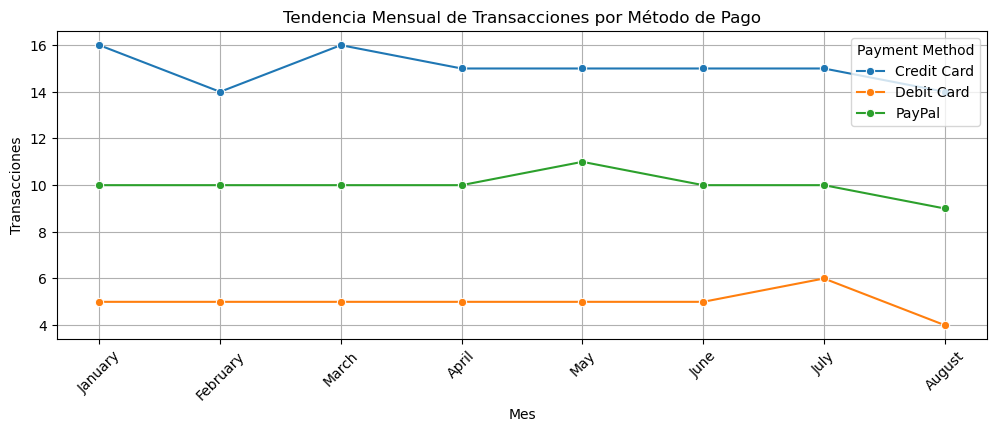

In [ ]:
# Gráfico de la tendencia mensual de Transacciones por Método de Pago
plt.figure(figsize=(12, 4))
sns.lineplot(data=transactions_method_by_month, x='Month', y='Transactions', hue = 'Payment Method', marker='o')
plt.title('Tendencia Mensual de Transacciones por Método de Pago')
plt.xlabel('Mes')
plt.ylabel('Transacciones')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

✅ **Respuesta:**

## **Impacto en ingresos y unidades vendidas**

### **4.** ¿Cómo se distribuyen los ingresos por método de pago?

In [ ]:
# Agrupamos y sumamos los ingresos totales por método de pago
payment_sales = data.groupby('Payment Method')['Total Revenue'].sum().sort_values(ascending=False).reset_index()

# Calcular porcentaje
payment_sales['Percentage'] = (payment_sales['Total Revenue'] / payment_sales['Total Revenue'].sum() * 100).round(2)
payment_sales

,Payment Method,Total Revenue,Percentage
0,Credit Card,51170.86,63.51
1,PayPal,21268.06,26.40
2,Debit Card,8128.93,10.09


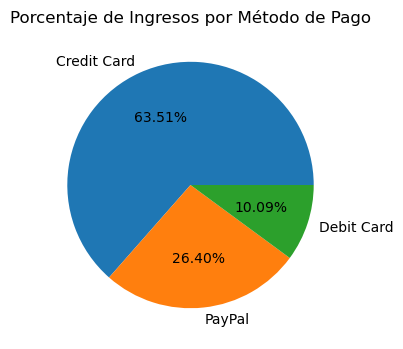

In [ ]:
# Graficamos
plt.figure(figsize=(4, 4))
plt.pie(payment_sales['Percentage'], labels = payment_sales['Payment Method'],autopct='%1.2f%%')
plt.title('Porcentaje de Ingresos por Método de Pago')
plt.show()

✅ **Respuesta:**

- La **tarjeta de crédito** aporta la mayor parte de los ingresos, con un **63.51%** del total.

- **PayPal** representa el **26.40%** de los ingresos.

- La **tarjeta de débito** contribuye con un **10.09%**.

### **5.** ¿Cual es el ticket promedio según el método de pago?

In [ ]:
# Calculamos el promedio de ingresos por método de pago
ticket_medio = data.groupby('Payment Method')['Total Revenue'].mean().reset_index().sort_values(by='Total Revenue', ascending=False).round(2)
ticket_medio.columns = ['Payment Method','Ticket Medio']
ticket_medio

,Payment Method,Ticket Medio
0,Credit Card,426.42
2,PayPal,265.85
1,Debit Card,203.22


✅ **Respuesta:**

El ticket medio varía según el método de pago:

- **Tarjeta de crédito:** 426.42

- **PayPal:** 265.85

- **Tarjeta de débito:** 203.22

Esto indica que las transacciones con tarjeta de crédito suelen tener un valor promedio más alto.

### **6.** ¿Hay diferencias de ingresos entre métodos de pago según la región?

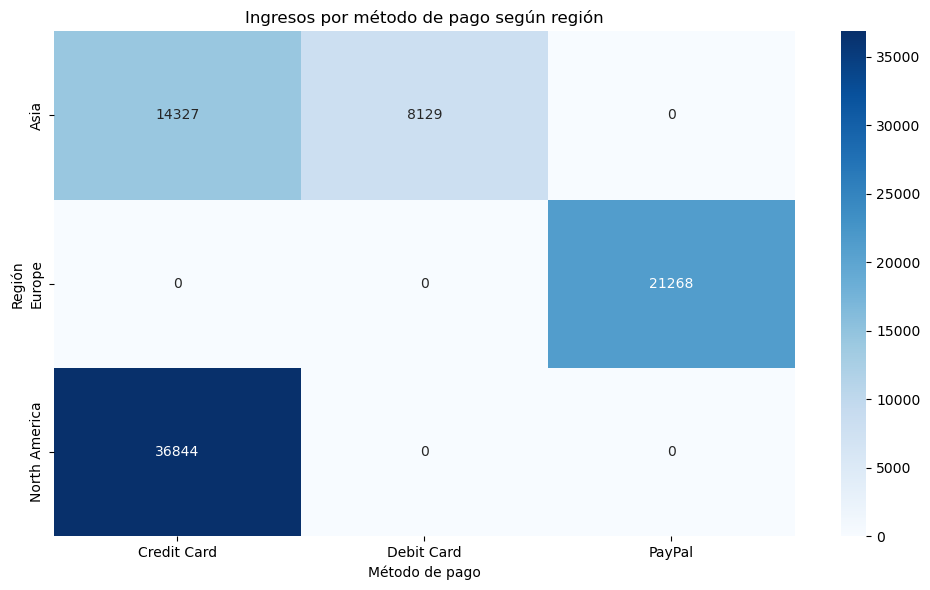

In [ ]:
# Creamos una tabla resumen con los ingresos por región y método de pago
region_payment = data.pivot_table(index='Region', columns='Payment Method', values='Total Revenue', aggfunc='sum', fill_value=0)

# Heatmap de ingresos por método de pago y región
plt.figure(figsize=(10,6))
sns.heatmap(region_payment, annot=True, fmt=".0f", cmap="Blues")
plt.title('Ingresos por método de pago según región')
plt.xlabel('Método de pago')
plt.ylabel('Región')
plt.tight_layout()
plt.show()

✅ **Respuesta:**

- En **Norteamérica**, los ingresos provienen exclusivamente de la tarjeta de crédito como método de pago.

- En **Europa**,  los ingresos se generan únicamente mediante PayPal.

- En **Asia** la mayor parte de los ingresos corresponde a la tarjeta de crédito, seguida en menor medida por la tarjeta de débito, sin registros de uso de PayPal.

### **7.** ¿Existe alguna correlación entre método de pago y unidades vendidas?

In [ ]:
# Agrupamos por método de pago y sumamos las unidades vendidas
payment_units_by_method = data.groupby('Payment Method')['Units Sold'].sum().sort_values(ascending=False).reset_index()
payment_units_by_method

,Payment Method,Units Sold
0,Credit Card,268
1,Debit Card,145
2,PayPal,105


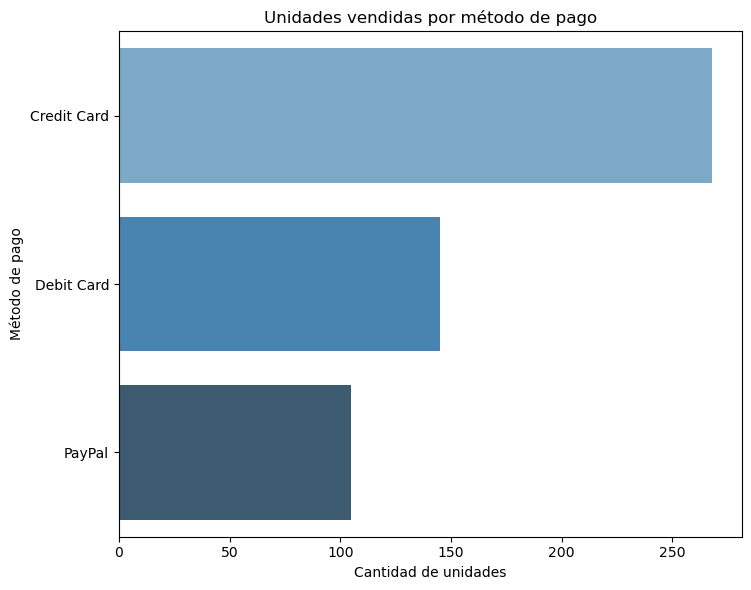

In [ ]:
plt.figure(figsize=(14,6))

# Gráfico de las unidades vendidas por método de pago
plt.subplot(1, 2, 2)
sns.barplot(data=payment_units_by_method, x='Units Sold', y='Payment Method', hue = 'Payment Method', palette='Blues_d')
plt.title('Unidades vendidas por método de pago')
plt.xlabel('Cantidad de unidades')
plt.ylabel('Método de pago')

plt.tight_layout()
plt.show()

✅ **Respuesta:**

La tarjeta de crédito también es el método con más unidades vendidas.


### 🏆 Bloque 4: Productos más vendidos

**Objetivo:** Identificar productos clave para priorizar inventario y marketing.

## Preguntas:
### **1.** ¿Cuáles son los productos más vendidos en cada categoría? ¿Y por región?

In [ ]:
# Agrupamos por categoría y nombre del producto sumando los ingresos
best_products_by_category = data.groupby(['Product Category', 'Product Name'])['Total Revenue'].sum().reset_index()

# Ordenamos por ingresos dentro de cada categoría
best_products_by_category = best_products_by_category.sort_values(['Product Category', 'Total Revenue'], ascending=[True, False])

# Tomamos el top 5 por categoría
top_ingresos_por_category = best_products_by_category.groupby('Product Category').head(5)
top_ingresos_por_category

,Product Category,Product Name,Total Revenue
10,Beauty Products,Dyson Supersonic Hair Dryer,399.99
21,Beauty Products,La Mer Crème de la Mer Moisturizer,190.00
4,Beauty Products,Chanel No. 5 Perfume,129.99
38,Beauty Products,Tom Ford Black Orchid Perfume,125.00
11,Beauty Products,Estee Lauder Advanced Night Repair,105.00
70,Books,The Silent Patient by Alex Michaelides,134.95
42,Books,Becoming by Michelle Obama,130.00
48,Books,"Salt, Fat, Acid, Heat by Samin Nosrat",107.97
52,Books,The Catcher in the Rye by J.D. Salinger,88.93
44,Books,Educated by Tara Westover,84.00


In [ ]:
# Agrupamos por región y nombre del producto, sumando los ingresos 
best_products_by_region = data.groupby(['Region', 'Product Name'])['Total Revenue'].sum().reset_index()

# Ordenamos por ingresos dentro de cada región
best_products_by_region = best_products_by_region.sort_values(by = ['Region','Total Revenue'], ascending=[False,False])

# Tomamos el top 5 por región
top_ingresos_por_region = best_products_by_region.groupby('Region').head(5)
top_ingresos_por_region

,Region,Product Name,Total Revenue
175,North America,Canon EOS R5 Camera,3899.99
191,North America,MacBook Pro 16-inch,2499.99
166,North America,Apple MacBook Pro 16-inch,2399.00
232,North America,iPhone 14 Pro,1999.98
186,North America,HP Spectre x360 Laptop,1599.99
127,Europe,LG OLED TV,2599.98
144,Europe,Roomba i7+,1599.98
84,Europe,Blueair Classic 480i,1199.98
103,Europe,Dyson Supersonic Hair Dryer,1199.97
99,Europe,De'Longhi Magnifica Espresso Machine,899.99


### **2.** ¿Qué productos tienen mejor rendimiento en unidades vendidas y cuáles en facturación?

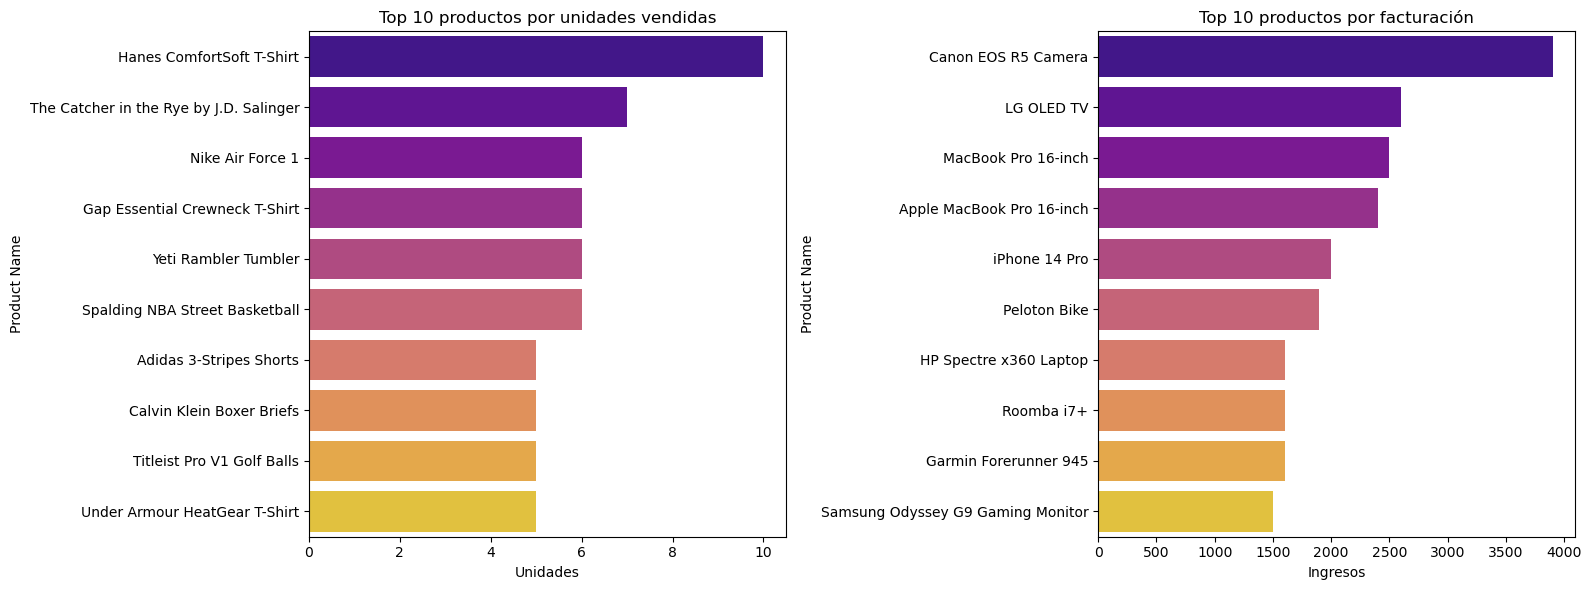

In [ ]:
# Combinamos cantidad e ingresos por producto
product_performance = data.groupby('Product Name')[['Units Sold', 'Total Revenue']].sum().reset_index()

# Ordenamos para ver los top en ambas métricas
top_units = product_performance.sort_values('Units Sold', ascending=False).head(10)
top_revenue = product_performance.sort_values('Total Revenue', ascending=False).head(10)

# Visualización
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Unidades
sns.barplot(x='Units Sold', y='Product Name', data=top_units, hue = 'Product Name', palette = 'plasma', ax=axs[0])
axs[0].set_title('Top 10 productos por unidades vendidas')
axs[0].set_xlabel('Unidades')

# Facturación
sns.barplot(x='Total Revenue', y='Product Name', data=top_revenue, hue = 'Product Name', palette = 'plasma', ax=axs[1])
axs[1].set_title('Top 10 productos por facturación')
axs[1].set_xlabel('Ingresos')

plt.tight_layout()
plt.show()

### **3.** ¿Hay productos con alta facturación pero pocas unidades?

In [ ]:
# Ordenar top_revenue por unidades vendidas ascendente
top_revenue_low_units = top_revenue.sort_values('Units Sold', ascending=True)
top_revenue_low_units

,Product Name,Units Sold,Total Revenue
39,Canon EOS R5 Camera,1,3899.99
124,MacBook Pro 16-inch,1,2499.99
18,Apple MacBook Pro 16-inch,1,2399.00
151,Peloton Bike,1,1895.00
91,HP Spectre x360 Laptop,1,1599.99
165,Samsung Odyssey G9 Gaming Monitor,1,1499.99
230,iPhone 14 Pro,2,1999.98
111,LG OLED TV,2,2599.98
160,Roomba i7+,2,1599.98
79,Garmin Forerunner 945,3,1599.97


Bloque 5: Evaluar el rendimiento de productos o categorías según la región
Objetivo: Identificar qué productos o categorías tienen mejor rendimiento según la región para orientar campañas de marketing localizadas.

📌 Preguntas clave:
¿Qué productos generan más ingresos en cada región?

¿Qué categoría es dominante por región en términos de ingresos y volumen de ventas?

¿Hay productos que se venden muy bien en una región pero no en otras?

¿Existen patrones regionales claros en cuanto a preferencias de compra?